# ** Loading the Property Data **

In [424]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [425]:
import pandas as pd
property_data = pd.read_csv('Property Record With Profile.csv')
property_data.head()

,Unnamed: 0,address,Sell Price,Sell Date,Auction,Last Sell Price,Last Sell Date,Rent Amount PW,Rent Date,Land Size SQM,...,Suburb_Code,Train Station,Bus Station,Hospitals,Schools,Restaurants,Shopping Center,Park,Sub_Lat,Sub_Long
0,0,4/44 Myers Street,510000.0,2020-09-01,0,NaN,NaN,NaN,NaN,NaN,...,10,1,8,20,3,85,4,1,-38.150341,144.361257
1,1,9 The Esplanade,2375000.0,2020-08-29,1,NaN,NaN,NaN,NaN,NaN,...,10,1,8,20,3,85,4,1,-38.150341,144.361257
2,2,158 Garden Street,1240000.0,2020-08-01,0,155000.0,2001-08-01,NaN,NaN,667.0,...,10,1,8,20,3,85,4,1,-38.150341,144.361257
3,3,86 Sydney Parade,560000.0,2020-08-15,1,65000.0,1996-03-01,NaN,NaN,319.0,...,10,1,8,20,3,85,4,1,-38.150341,144.361257
4,4,2/52 Mundy Street,720000.0,2020-08-01,0,657000.0,2016-01-01,500.0,2014-09-01,410.0,...,10,1,8,20,3,85,4,1,-38.150341,144.361257


# ** Dropping unwanted columns from the dataset **

In [426]:
property_data = property_data.drop(['Unnamed: 0', 'address'], axis=1)
property_data.head()

,Sell Price,Sell Date,Auction,Last Sell Price,Last Sell Date,Rent Amount PW,Rent Date,Land Size SQM,Building Size SQM,Bedrooms,...,Suburb_Code,Train Station,Bus Station,Hospitals,Schools,Restaurants,Shopping Center,Park,Sub_Lat,Sub_Long
0,510000.0,2020-09-01,0,NaN,NaN,NaN,NaN,NaN,NaN,0,...,10,1,8,20,3,85,4,1,-38.150341,144.361257
1,2375000.0,2020-08-29,1,NaN,NaN,NaN,NaN,NaN,NaN,0,...,10,1,8,20,3,85,4,1,-38.150341,144.361257
2,1240000.0,2020-08-01,0,155000.0,2001-08-01,NaN,NaN,667.0,214.0,3,...,10,1,8,20,3,85,4,1,-38.150341,144.361257
3,560000.0,2020-08-15,1,65000.0,1996-03-01,NaN,NaN,319.0,NaN,3,...,10,1,8,20,3,85,4,1,-38.150341,144.361257
4,720000.0,2020-08-01,0,657000.0,2016-01-01,500.0,2014-09-01,410.0,NaN,5,...,10,1,8,20,3,85,4,1,-38.150341,144.361257


In [427]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13080 entries, 0 to 13079
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sell Price         13080 non-null  float64
 1   Sell Date          13080 non-null  object 
 2   Auction            13080 non-null  int64  
 3   Last Sell Price    5674 non-null   float64
 4   Last Sell Date     5674 non-null   object 
 5   Rent Amount PW     2274 non-null   float64
 6   Rent Date          2274 non-null   object 
 7   Land Size SQM      12506 non-null  float64
 8   Building Size SQM  6750 non-null   float64
 9   Bedrooms           13080 non-null  int64  
 10  Toilets            13080 non-null  int64  
 11  Cars               13080 non-null  int64  
 12  Suburb             13080 non-null  object 
 13  Suburb_Code        13080 non-null  int64  
 14  Train Station      13080 non-null  int64  
 15  Bus Station        13080 non-null  int64  
 16  Hospitals          130

In [428]:
property_data.describe(include=['object'])

,Sell Date,Last Sell Date,Rent Date,Suburb
count,13080,5674,2274,13080
unique,1114,420,176,30
top,2020-08-01,2000-02-01,2019-11-01,Highton
freq,412,190,107,727


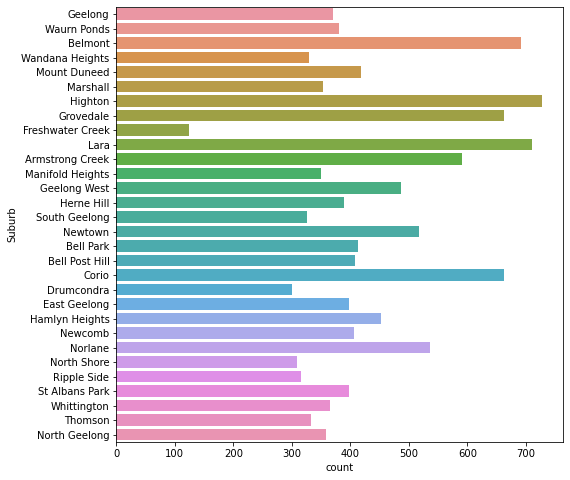

In [429]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
sns.countplot(y='Suburb', data=property_data)

# ** Feature Engineering **

In [430]:
corr_matrix = property_data.corr()
corr_matrix["Last Sell Price"].sort_values(ascending=False)

Last Sell Price      1.000000
Sell Price           0.516942
Toilets              0.224907
Shopping Center      0.200119
Restaurants          0.187748
Hospitals            0.177907
Bus Station          0.153721
Bedrooms             0.142622
Building Size SQM    0.125588
Cars                 0.125063
Land Size SQM        0.112195
Schools              0.085314
Auction              0.049670
Rent Amount PW       0.043921
Train Station        0.019102
Sub_Lat             -0.017014
Park                -0.025840
Suburb_Code         -0.041813
Sub_Long            -0.118127
Name: Last Sell Price, dtype: float64

The last sold price tends to increase when the Sell Price go up. 
You can see a small negative correlation between thePark,Suburb_code and the last sell price. 
And finally, coefficients close to zero indicate that there is no linear correlation.

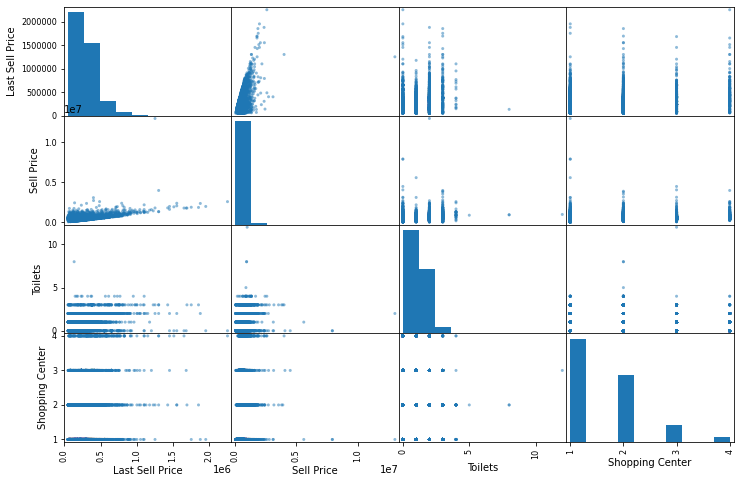

In [431]:
from pandas.plotting import scatter_matrix
attributes = ["Last Sell Price", "Sell Price", "Toilets", "Shopping Center"]
scatter_matrix(property_data[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

The most promising variable for predicting the last sell price is the Sell Price, 
so let’s zoom in on their correlation scatter plot.

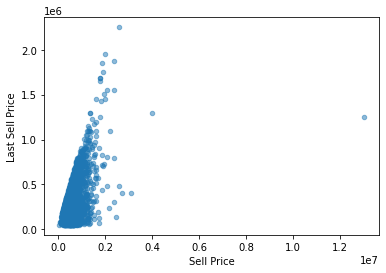

In [432]:
property_data.plot(kind="scatter", x="Sell Price", y="Last Sell Price", alpha=0.5)
plt.savefig('scatter.png')

The correlation is indeed very strong; you can clearly see the upward trend and that the points are not too dispersed.
It also shows one of the prices as outliers which we will handle it later

In [433]:
property_data['price_per_sqft'] = property_data['Last Sell Price']/property_data['Building Size SQM']
corr_matrix = property_data.corr()
corr_matrix["Last Sell Price"].sort_values(ascending=False)

Last Sell Price      1.000000
Sell Price           0.516942
price_per_sqft       0.364966
Toilets              0.224907
Shopping Center      0.200119
Restaurants          0.187748
Hospitals            0.177907
Bus Station          0.153721
Bedrooms             0.142622
Building Size SQM    0.125588
Cars                 0.125063
Land Size SQM        0.112195
Schools              0.085314
Auction              0.049670
Rent Amount PW       0.043921
Train Station        0.019102
Sub_Lat             -0.017014
Park                -0.025840
Suburb_Code         -0.041813
Sub_Long            -0.118127
Name: Last Sell Price, dtype: float64

Unfortunately, the new price_per_sqft variable shows only a  small positive correlation with the last sold price. 
But we still use this variable for grouping the neighborhoods

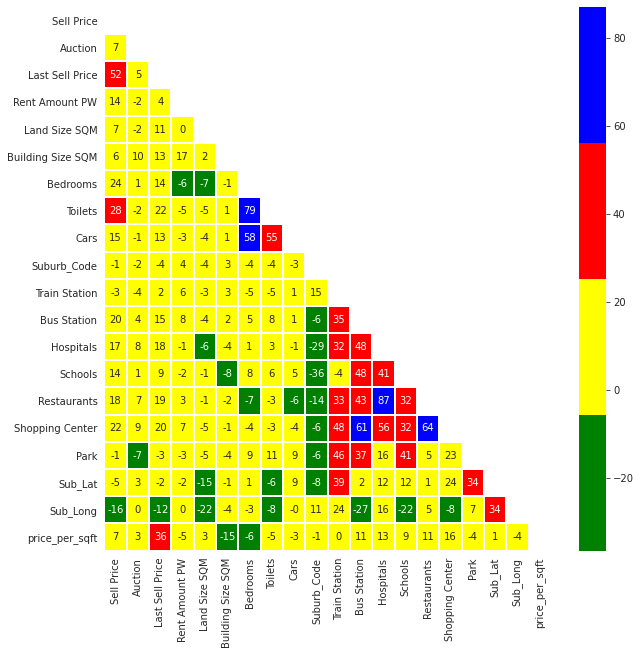

In [434]:
from matplotlib.colors import ListedColormap
import numpy as np

mask=np.zeros_like(property_data.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(property_data.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

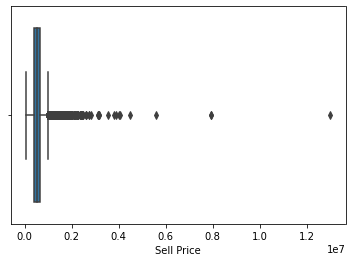

In [435]:
sns.boxplot(property_data['Sell Price'])

In [436]:
property_data['Sell Price'].sort_values(ascending=False).head()

11399    13000001.0
11419     7920000.0
11420     7920000.0
5529      5600000.0
6767      4500000.0
Name: Sell Price, dtype: float64

In [437]:
property_data[property_data['Sell Price'] == 13000001.0]

,Sell Price,Sell Date,Auction,Last Sell Price,Last Sell Date,Rent Amount PW,Rent Date,Land Size SQM,Building Size SQM,Bedrooms,...,Train Station,Bus Station,Hospitals,Schools,Restaurants,Shopping Center,Park,Sub_Lat,Sub_Long,price_per_sqft
11399,13000001.0,2015-10-01,0,1250000.0,2007-06-01,NaN,NaN,274.0,NaN,3,...,0,4,1,0,6,1,2,-38.123069,144.356034,NaN


# ** Fill NaN Values **

In [438]:
# Display number of missing values by numeric feature
property_data.select_dtypes(exclude=['object']).isnull().sum()

Sell Price               0
Auction                  0
Last Sell Price       7406
Rent Amount PW       10806
Land Size SQM          574
Building Size SQM     6330
Bedrooms                 0
Toilets                  0
Cars                     0
Suburb_Code              0
Train Station            0
Bus Station              0
Hospitals                0
Schools                  0
Restaurants              0
Shopping Center          0
Park                     0
Sub_Lat                  0
Sub_Long                 0
price_per_sqft       10890
dtype: int64

In [439]:
property_data['Last Sell Price'] = property_data['Last Sell Price'].fillna(0.0)
property_data['Rent Amount PW'] = property_data['Rent Amount PW'].fillna(0.0)

In [440]:
s = property_data.groupby('Suburb')['Last Sell Price'].mean()
property_data['Last Sell Price'] = property_data['Last Sell Price'].fillna(property_data['Suburb'].map(s))
s

Suburb
Armstrong Creek      38126.311337
Bell Park           105603.983051
Bell Post Hill      132444.068627
Belmont             103633.641618
Corio                71515.835596
Drumcondra           99927.242525
East Geelong        171182.924623
Freshwater Creek     92637.096774
Geelong             248888.762162
Geelong West        171463.251029
Grovedale           102945.184290
Hamlyn Heights      116748.571744
Herne Hill          135869.773779
Highton              97599.510316
Lara                 81206.690141
Manifold Heights    198715.830946
Marshall            101101.280453
Mount Duneed         55270.687351
Newcomb             114413.120690
Newtown             170988.361004
Norlane              75740.615672
North Geelong       210879.888268
North Shore         157611.650485
Ripple Side         121561.746032
South Geelong       149867.310769
St Albans Park      145482.575377
Thomson             148463.855422
Wandana Heights     183013.636364
Waurn Ponds         171637.368421
Whittin

In [441]:
property_data['Sell Date'] = pd.to_datetime(property_data['Sell Date'])
property_data['Last Sell Date'] = pd.to_datetime(property_data['Last Sell Date'])
property_data['Last Sell Days'] = property_data['Sell Date'].sub(property_data['Last Sell Date'], axis=0)
property_data['Last Sell Days'] = property_data['Last Sell Days'] / np.timedelta64(1, 'D')
property_data['Last Sell Days'] = property_data['Last Sell Days'].fillna(0.0)
property_data[['Sell Date', 'Last Sell Date', 'Last Sell Days']].head()

,Sell Date,Last Sell Date,Last Sell Days
0,2020-09-01,NaT,0.0
1,2020-08-29,NaT,0.0
2,2020-08-01,2001-08-01,6940.0
3,2020-08-15,1996-03-01,8933.0
4,2020-08-01,2016-01-01,1674.0


In [442]:
property_data[['Last Sell Date', 'Last Sell Price','Suburb']].head()

,Last Sell Date,Last Sell Price,Suburb
0,NaT,0.0,Geelong
1,NaT,0.0,Geelong
2,2001-08-01,155000.0,Geelong
3,1996-03-01,65000.0,Geelong
4,2016-01-01,657000.0,Geelong


In [443]:
property_data['Year'] = pd.DatetimeIndex(property_data['Last Sell Date']).year
property_data['Year']

0           NaN
1           NaN
2        2001.0
3        1996.0
4        2016.0
          ...  
13075       NaN
13076       NaN
13077       NaN
13078       NaN
13079       NaN
Name: Year, Length: 13080, dtype: float64

In [444]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13080 entries, 0 to 13079
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sell Price         13080 non-null  float64       
 1   Sell Date          13080 non-null  datetime64[ns]
 2   Auction            13080 non-null  int64         
 3   Last Sell Price    13080 non-null  float64       
 4   Last Sell Date     5674 non-null   datetime64[ns]
 5   Rent Amount PW     13080 non-null  float64       
 6   Rent Date          2274 non-null   object        
 7   Land Size SQM      12506 non-null  float64       
 8   Building Size SQM  6750 non-null   float64       
 9   Bedrooms           13080 non-null  int64         
 10  Toilets            13080 non-null  int64         
 11  Cars               13080 non-null  int64         
 12  Suburb             13080 non-null  object        
 13  Suburb_Code        13080 non-null  int64         
 14  Train 

# ** Creating a new dataframe for Average Sell Price,Suburb,Suburb Code and year **

In [445]:
new_property_data = property_data.drop(["Sell Price","Sell Date","Auction","Last Sell Date","Rent Amount PW","Rent Date","Land Size SQM","Building Size SQM","Bedrooms","Toilets","Cars","Train Station","Bus Station","Hospitals","Schools","Restaurants","Shopping Center","Park","price_per_sqft","Last Sell Days"],axis =1)
new_property_data.head()

,Last Sell Price,Suburb,Suburb_Code,Sub_Lat,Sub_Long,Year
0,0.0,Geelong,10,-38.150341,144.361257,NaN
1,0.0,Geelong,10,-38.150341,144.361257,NaN
2,155000.0,Geelong,10,-38.150341,144.361257,2001.0
3,65000.0,Geelong,10,-38.150341,144.361257,1996.0
4,657000.0,Geelong,10,-38.150341,144.361257,2016.0


In [446]:
new_property_data = new_property_data.dropna(axis = 0)
new_property_data['Year'] = new_property_data['Year'].astype(int)
new_property_data['Suburb'] = new_property_data['Suburb'].astype(str)
new_property_data.rename(columns = {'Last Sell Price':'Average Sell Price'}, inplace = True) 
new_property_data = new_property_data.groupby(["Suburb"]).apply(lambda x: x.sort_values(["Year"], ascending = True)).reset_index(drop=True)
new_property_data

,Average Sell Price,Suburb,Suburb_Code,Sub_Lat,Sub_Long,Year
0,185000.0,Armstrong Creek,1,-38.236835,144.367373,2000
1,155000.0,Armstrong Creek,1,-38.236835,144.367373,2000
2,145000.0,Armstrong Creek,1,-38.236835,144.367373,2000
3,189000.0,Armstrong Creek,1,-38.236835,144.367373,2000
4,149000.0,Armstrong Creek,1,-38.236835,144.367373,2000
...,...,...,...,...,...,...
5669,240000.0,Whittington,31,-38.179956,144.393141,2017
5670,321500.0,Whittington,31,-38.179956,144.393141,2017
5671,267500.0,Whittington,31,-38.179956,144.393141,2017
5672,340000.0,Whittington,31,-38.179956,144.393141,2018


In [447]:
#Calculating the mean of selling prices for suburbs

new_property_data1 = new_property_data.groupby(['Year','Suburb']).mean()
new_property_data1 = new_property_data1.reset_index()
new_property_data1.head()

,Year,Suburb,Average Sell Price,Suburb_Code,Sub_Lat,Sub_Long
0,1978,Grovedale,51000.0,12,-38.200192,144.345164
1,1979,Belmont,51000.0,4,-38.174078,144.339275
2,1979,Hamlyn Heights,60000.0,13,-38.123452,144.322915
3,1979,Newtown,120000.0,21,-38.148534,144.332388
4,1980,Highton,58000.0,15,-38.177915,144.314356


In [448]:
#Copying the suburb, latitude and longitude to another dataframe

selected_columns = new_property_data1[["Suburb","Sub_Lat","Sub_Long"]]
new_df = selected_columns.copy()
print(new_df)

             Suburb    Sub_Lat    Sub_Long
0         Grovedale -38.200192  144.345164
1           Belmont -38.174078  144.339275
2    Hamlyn Heights -38.123452  144.322915
3           Newtown -38.148534  144.332388
4           Highton -38.177915  144.314356
..              ...        ...         ...
780           Corio -38.075763  144.354037
781       Grovedale -38.200192  144.345164
782            Lara -38.023116  144.394884
783         Norlane -38.090832  144.353389
784   North Geelong -38.108008  144.351491

[785 rows x 3 columns]


In [449]:
#dropping off the latitude and longitude

new_property_data1 = new_property_data1.drop(['Sub_Lat','Sub_Long'],axis = 1)
new_property_data1

,Year,Suburb,Average Sell Price,Suburb_Code
0,1978,Grovedale,51000.0,12
1,1979,Belmont,51000.0,4
2,1979,Hamlyn Heights,60000.0,13
3,1979,Newtown,120000.0,21
4,1980,Highton,58000.0,15
...,...,...,...,...
780,2019,Corio,431000.0,6
781,2019,Grovedale,548500.0,12
782,2019,Lara,450000.0,16
783,2019,Norlane,230000.0,22


In [450]:
#Creating a dictionary for Suburb Code and Suburbs

new_property_data2 = dict(zip(new_property_data1.Suburb_Code, new_property_data1.Suburb))
new_property_data2

{12: 'Grovedale',
 4: 'Belmont',
 13: 'Hamlyn Heights',
 21: 'Newtown',
 15: 'Highton',
 3: 'Bell Post Hill',
 10: 'Geelong',
 9: 'Freshwater Creek',
 18: 'Marshall',
 7: 'Drumcondra',
 11: 'Geelong West',
 16: 'Lara',
 22: 'Norlane',
 25: 'Ripple Side',
 26: 'South Geelong',
 8: 'East Geelong',
 14: 'Herne Hill',
 17: 'Manifold Heights',
 20: 'Newcomb',
 27: 'St Albans Park',
 2: 'Bell Park',
 6: 'Corio',
 29: 'Wandana Heights',
 31: 'Whittington',
 24: 'North Shore',
 30: 'Waurn Ponds',
 28: 'Thomson',
 19: 'Mount Duneed',
 23: 'North Geelong',
 1: 'Armstrong Creek'}

In [451]:
feature_cols = new_property_data1.columns.tolist()
feature_cols

['Year', 'Suburb', 'Average Sell Price', 'Suburb_Code']

# **Linear regression model to predict the average selling prices for next 20 years**

In [452]:
#Rearranging the columns
new_property_data1 = new_property_data1[['Suburb_Code','Year','Suburb','Average Sell Price']]
new_property_data1.head()

,Suburb_Code,Year,Suburb,Average Sell Price
0,12,1978,Grovedale,51000.0
1,4,1979,Belmont,51000.0
2,13,1979,Hamlyn Heights,60000.0
3,21,1979,Newtown,120000.0
4,15,1980,Highton,58000.0


In [453]:
# Create separate object for target variable
y = new_property_data1.iloc[:,-1].values.reshape(-1,1)

# Create separate object for input features
X = new_property_data1.iloc[:,0:2].values

In [454]:
#Evaluating the accuracy of the model

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)
y_pred = model.predict([[31,2050]])
print(y_pred)
print(model.coef_)
print(model.intercept_)

[[799461.37056173]]
[[ -541.18822864 11965.5553609 ]]
[-23713150.28420196]


In [455]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as skm
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LinearRegression().fit(X_train, y_train)
y_pred1 = model.predict(X_test)

mse = np.mean((y_pred1 - y_test)**2)
print("MSE:{}".format(mse))
mae_SKL = skm.mean_absolute_error(y_test, y_pred1)
print("Error:{}".format(mae_SKL))
rs = r2_score(y_test, y_pred1)
print("R-Squared Score:{}".format(rs))

MSE:9454916667.602318
Error:72686.90961176254
R-Squared Score:0.6008645523096732


In [456]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge


lm = Ridge()

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores   

array([0.55890356, 0.43647148, 0.32403878, 0.51297974, 0.4646065 ])

In [457]:
#prediction for next 20 years using Linear regression

for i in range(2020,2051):
    for j in range(1,32):
        y_pred=model.predict([[j,i]])
        print(j,i,"={}".format(y_pred))
        new_property_data1 = new_property_data1.append({"Suburb_Code": j,"Year" : i,"Average Sell Price" : y_pred}, ignore_index = True) 

1 2020 =[[457974.69337755]]
2 2020 =[[457357.89810956]]
3 2020 =[[456741.10284157]]
4 2020 =[[456124.30757359]]
5 2020 =[[455507.5123056]]
6 2020 =[[454890.71703761]]
7 2020 =[[454273.92176962]]
8 2020 =[[453657.12650163]]
9 2020 =[[453040.33123365]]
10 2020 =[[452423.53596565]]
11 2020 =[[451806.74069767]]
12 2020 =[[451189.94542968]]
13 2020 =[[450573.15016169]]
14 2020 =[[449956.3548937]]
15 2020 =[[449339.55962572]]
16 2020 =[[448722.76435773]]
17 2020 =[[448105.96908974]]
18 2020 =[[447489.17382175]]
19 2020 =[[446872.37855376]]
20 2020 =[[446255.58328578]]
21 2020 =[[445638.78801779]]
22 2020 =[[445021.9927498]]
23 2020 =[[444405.19748181]]
24 2020 =[[443788.40221382]]
25 2020 =[[443171.60694584]]
26 2020 =[[442554.81167785]]
27 2020 =[[441938.01640986]]
28 2020 =[[441321.22114187]]
29 2020 =[[440704.42587388]]
30 2020 =[[440087.63060589]]
31 2020 =[[439470.8353379]]
1 2021 =[[469826.21373247]]
2 2021 =[[469209.41846449]]
3 2021 =[[468592.6231965]]
4 2021 =[[467975.82792851]]
5 2

24 2029 =[[550452.08540814]]
25 2029 =[[549835.29014015]]
26 2029 =[[549218.49487216]]
27 2029 =[[548601.69960417]]
28 2029 =[[547984.90433618]]
29 2029 =[[547368.10906819]]
30 2029 =[[546751.3138002]]
31 2029 =[[546134.51853222]]
1 2030 =[[576489.89692679]]
2 2030 =[[575873.1016588]]
3 2030 =[[575256.30639081]]
4 2030 =[[574639.51112282]]
5 2030 =[[574022.71585483]]
6 2030 =[[573405.92058685]]
7 2030 =[[572789.12531886]]
8 2030 =[[572172.33005087]]
9 2030 =[[571555.53478288]]
10 2030 =[[570938.73951489]]
11 2030 =[[570321.9442469]]
12 2030 =[[569705.14897892]]
13 2030 =[[569088.35371093]]
14 2030 =[[568471.55844294]]
15 2030 =[[567854.76317495]]
16 2030 =[[567237.96790696]]
17 2030 =[[566621.17263898]]
18 2030 =[[566004.37737099]]
19 2030 =[[565387.582103]]
20 2030 =[[564770.78683501]]
21 2030 =[[564153.99156702]]
22 2030 =[[563537.19629904]]
23 2030 =[[562920.40103105]]
24 2030 =[[562303.60576306]]
25 2030 =[[561686.81049507]]
26 2030 =[[561070.01522708]]
27 2030 =[[560453.2199591]]


12 2039 =[[676368.83217322]]
13 2039 =[[675752.03690524]]
14 2039 =[[675135.24163725]]
15 2039 =[[674518.44636926]]
16 2039 =[[673901.65110127]]
17 2039 =[[673284.85583328]]
18 2039 =[[672668.0605653]]
19 2039 =[[672051.26529731]]
20 2039 =[[671434.47002932]]
21 2039 =[[670817.67476133]]
22 2039 =[[670200.87949334]]
23 2039 =[[669584.08422536]]
24 2039 =[[668967.28895737]]
25 2039 =[[668350.49368938]]
26 2039 =[[667733.69842139]]
27 2039 =[[667116.9031534]]
28 2039 =[[666500.10788541]]
29 2039 =[[665883.31261742]]
30 2039 =[[665266.51734944]]
31 2039 =[[664649.72208145]]
1 2040 =[[695005.10047602]]
2 2040 =[[694388.30520803]]
3 2040 =[[693771.50994005]]
4 2040 =[[693154.71467206]]
5 2040 =[[692537.91940407]]
6 2040 =[[691921.12413608]]
7 2040 =[[691304.32886809]]
8 2040 =[[690687.53360011]]
9 2040 =[[690070.73833212]]
10 2040 =[[689453.94306413]]
11 2040 =[[688837.14779614]]
12 2040 =[[688220.35252815]]
13 2040 =[[687603.55726016]]
14 2040 =[[686986.76199218]]
15 2040 =[[686369.9667241

24 2048 =[[775630.97215168]]
25 2048 =[[775014.17688369]]
26 2048 =[[774397.38161571]]
27 2048 =[[773780.58634772]]
28 2048 =[[773163.79107973]]
29 2048 =[[772546.99581174]]
30 2048 =[[771930.20054375]]
31 2048 =[[771313.40527576]]
1 2049 =[[801668.78367033]]
2 2049 =[[801051.98840234]]
3 2049 =[[800435.19313436]]
4 2049 =[[799818.39786637]]
5 2049 =[[799201.60259838]]
6 2049 =[[798584.80733039]]
7 2049 =[[797968.0120624]]
8 2049 =[[797351.21679442]]
9 2049 =[[796734.42152643]]
10 2049 =[[796117.62625844]]
11 2049 =[[795500.83099045]]
12 2049 =[[794884.03572246]]
13 2049 =[[794267.24045447]]
14 2049 =[[793650.44518648]]
15 2049 =[[793033.6499185]]
16 2049 =[[792416.85465051]]
17 2049 =[[791800.05938252]]
18 2049 =[[791183.26411453]]
19 2049 =[[790566.46884654]]
20 2049 =[[789949.67357856]]
21 2049 =[[789332.87831057]]
22 2049 =[[788716.08304258]]
23 2049 =[[788099.28777459]]
24 2049 =[[787482.4925066]]
25 2049 =[[786865.69723862]]
26 2049 =[[786248.90197063]]
27 2049 =[[785632.10670264

In [458]:
new_property_data1

,Suburb_Code,Year,Suburb,Average Sell Price
0,12,1978,Grovedale,51000
1,4,1979,Belmont,51000
2,13,1979,Hamlyn Heights,60000
3,21,1979,Newtown,120000
4,15,1980,Highton,58000
...,...,...,...,...
1741,27,2050,NaN,[[797483.6270575635]]
1742,28,2050,NaN,[[796866.8317895718]]
1743,29,2050,NaN,[[796250.0365215838]]
1744,30,2050,NaN,[[795633.2412535958]]


In [459]:
new_property_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Suburb_Code         1746 non-null   int64 
 1   Year                1746 non-null   int64 
 2   Suburb              785 non-null    object
 3   Average Sell Price  1746 non-null   object
dtypes: int64(2), object(2)
memory usage: 54.7+ KB


In [460]:
#Converting the type of Sell Price from Object to float
new_property_data1['Average Sell Price'] = new_property_data1['Average Sell Price'].astype(float)

In [461]:
#Filling the NaN values with Suburbs based on the Suburb code
new_property_data1['Suburb'] = new_property_data1['Suburb'].fillna(new_property_data1['Suburb_Code'].map(new_property_data2))
new_property_data1

,Suburb_Code,Year,Suburb,Average Sell Price
0,12,1978,Grovedale,51000.000000
1,4,1979,Belmont,51000.000000
2,13,1979,Hamlyn Heights,60000.000000
3,21,1979,Newtown,120000.000000
4,15,1980,Highton,58000.000000
...,...,...,...,...
1741,27,2050,St Albans Park,797483.627058
1742,28,2050,Thomson,796866.831790
1743,29,2050,Wandana Heights,796250.036522
1744,30,2050,Waurn Ponds,795633.241254


In [462]:
#Dropping of NaN values for suburb code 5 as it doesnt exist
new_property_data1 = new_property_data1.dropna()
new_property_data1

,Suburb_Code,Year,Suburb,Average Sell Price
0,12,1978,Grovedale,51000.000000
1,4,1979,Belmont,51000.000000
2,13,1979,Hamlyn Heights,60000.000000
3,21,1979,Newtown,120000.000000
4,15,1980,Highton,58000.000000
...,...,...,...,...
1741,27,2050,St Albans Park,797483.627058
1742,28,2050,Thomson,796866.831790
1743,29,2050,Wandana Heights,796250.036522
1744,30,2050,Waurn Ponds,795633.241254


In [463]:
#grouping the suburbs together according to the year in an ascending(year) fashion
new_property_data1 = new_property_data1.groupby(["Suburb"]).apply(lambda x: x.sort_values(["Year"], ascending = True)).reset_index(drop=True)
new_property_data1

,Suburb_Code,Year,Suburb,Average Sell Price
0,1,2000,Armstrong Creek,170812.500000
1,1,2010,Armstrong Creek,175000.000000
2,1,2011,Armstrong Creek,170100.000000
3,1,2012,Armstrong Creek,176428.571429
4,1,2013,Armstrong Creek,187363.636364
...,...,...,...,...
1710,31,2046,Whittington,747610.364566
1711,31,2047,Whittington,759461.884921
1712,31,2048,Whittington,771313.405276
1713,31,2049,Whittington,783164.925631


In [464]:
#Merging the suburb latitude and longitude with Average Sell Price based on suburb

new_property_data1 = pd.merge(new_property_data1,new_df,on='Suburb')
new_property_data1 = new_property_data1.groupby(['Year','Suburb']).mean().reset_index()
new_property_data1

,Year,Suburb,Suburb_Code,Average Sell Price,Sub_Lat,Sub_Long
0,1978,Grovedale,12,51000.000000,-38.200192,144.345164
1,1979,Belmont,4,51000.000000,-38.174078,144.339275
2,1979,Hamlyn Heights,13,60000.000000,-38.123452,144.322915
3,1979,Newtown,21,120000.000000,-38.148534,144.332388
4,1980,Highton,15,58000.000000,-38.177915,144.314356
...,...,...,...,...,...,...
1710,2050,St Albans Park,27,797483.627058,-38.190721,144.394283
1711,2050,Thomson,28,796866.831790,-38.170835,144.380301
1712,2050,Wandana Heights,29,796250.036522,-38.176755,144.302505
1713,2050,Waurn Ponds,30,795633.241254,-38.212100,144.304194


# **Saving the model to a file**

In [465]:
import zipfile
import pickle
print("Export the model to model_avg.pkl")
f=open('model_avg.pkl', 'wb')
pickle.dump(model_avg,f)
f.close()

zipfile.ZipFile('model_avg.zip', mode='w').write('model_avg.pkl')

Export the model to model_avg.pkl


NameError: name 'model_avg' is not defined

In [ ]:
#Saving the predicted average selling prices to a csv
new_property_data1.to_csv("Final predicted average prices.csv",header = True)